#PyTorch WorkFlow
Lets explore an example PyTorch end-to-end workflow.

https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
what_were_covering = {1: 'data (prepare and load',
                       2: 'build model',
                       3: 'fitting the model to data (training)',
                       4: 'making prediction and evaluting a model (inference)',
                       5: 'saving and loading a model',
                       6: 'putting it all together'}

#read torch.nn

In [ ]:
import torch
from torch import nn #nn contains all of PyTorch building blocks for neural networks
import matplotlib.pyplot as plt

## 1. Data (preparing and loading)

Data can be almost anything in machine learning

. Excel speadsheet
. Images of any kind
. Audio
. Videos
. DNA

Machine Learning is a game of two parts:

1. Get data into a numerical represation.
2. Build a model to learn patterns in that numerical representation.

To showcas this, lets craete some *known* data using the linear regressin formula.

We'll use a linear regression formula to make a straight line with known parameters

In [ ]:
# Create *known* parameter
#Y = a + bx

weight = 0.7 #b
bias = 0.3  #a

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (onde of the most important concepts in machine learning in general)
Let's create a trainig and test set with our data


In [ ]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

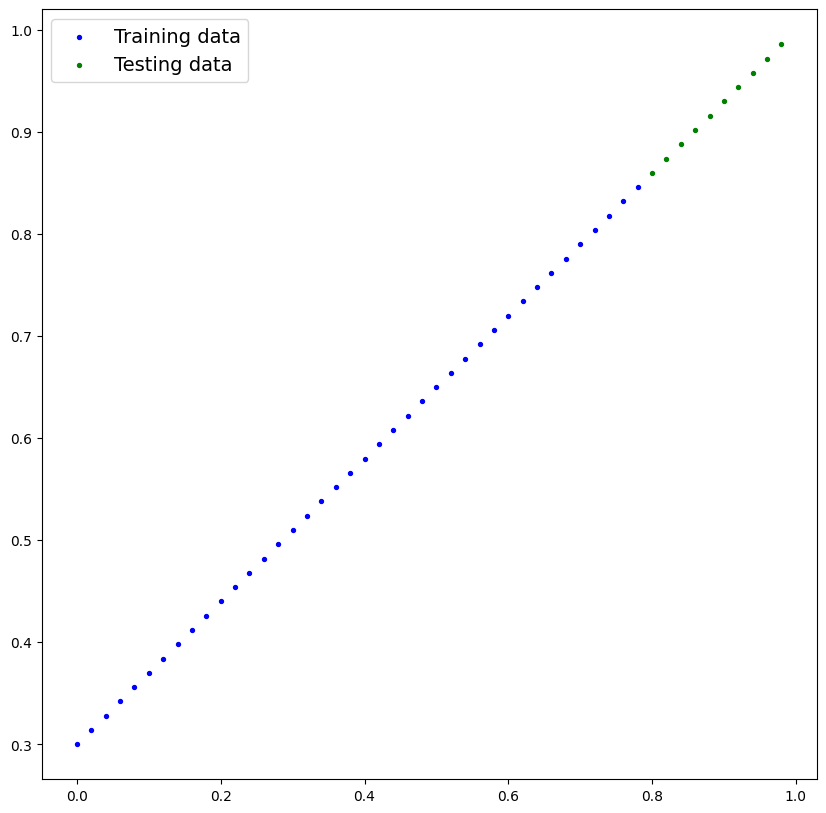

In [ ]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  '''
  Plots training data, test data and compares predictions.
  '''
  plt.figure(figsize=(10, 10))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=8, label='Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=8, label='Testing data')

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=8, label='Predictions')

  plt.legend(prop={'size': 14})
plot_prediction()

## 2. Build model

Our first Pytorch model!
* Start with random values (weight and bias)
* Look at training dara and adjust the random values to better represent (or get closer) the ideal values (the weights & bias valuse we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [ ]:
# Create a linear regretion model class
class LinearRegressionModel(nn.Module): # Almost everythin in Pytorch inherhits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # Start with a random weight and try to adjust it to the ideal
                                            requires_grad=True, # can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # PyTorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1, # Start with random bias and adjust to the ideal one
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, X: torch.Tensor) -> torch.Tensor: #'x' is the input data
    return self.weights*X + self.bias

### PyTorch model building essentials

* torch.nn - contains all of the building for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and leanr, often a Pytorch layer from torch.nn will set these for us
* torch.nnModule - the base for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def Forward() - All nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

1. Get data ready (torchvision.transform, torch.utils.data.Dataset, torch.utils.data.DataLoader)
2. Build or pick a pretrained model (torch.optim, torch.nn, torch.nn.Module, torchvision.models)
3. Fit the model to the data and make prediction
4. Evaluate the model (torchmetrics)
5. Improve through experimentation (torch.utils.tensorboard)
6 Save and reload the model

### Checking the contents of our PyTorch model
Now we've created a model, let's see whtas inside_circle
So we can check our model parameters or whats inside our  model using '.parameters'.

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())
#model_0

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List anmed parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using 'torch.inference_mode()'

To check out models predictive power, lets see how well it predicts 'y_test' based on 'X_test'

When we pass data through our model, it's going to run it through the 'forward()' method.

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

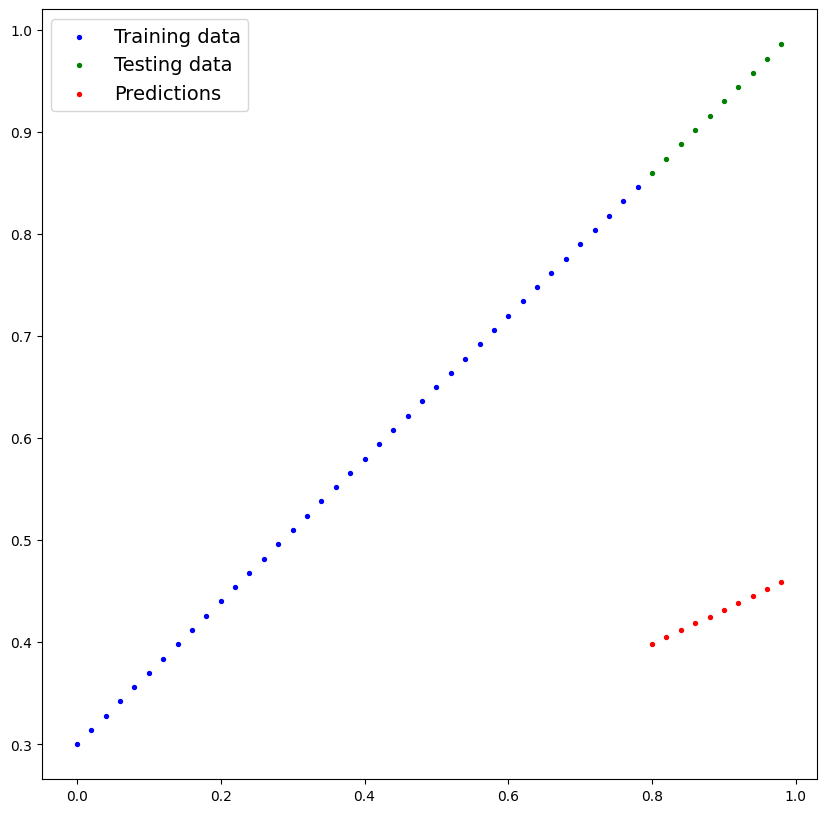

In [ ]:
plot_prediction(predictions=y_preds)

In [ ]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test
# The objective is to have the red dots on top of the green dots, because our ideal model will be perfectly
# predicting the test data


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

# 3. Train model

The whole idea of training is ofr a model to move from some *unknown* parameters (these may be random) to some *known* parameters
or in other word from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong the models predictions are is to use a loss funtion

* Note: Loos funtion may also be called cost function or criterious in different areas. In our case we're going to refer to it as a loss function.

Thing we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optmizer:** Takes into account the loss of a model and adjusts the model's parameters (weight & bias in this case) to improve the loss funciton.

And specifically for Pytorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our models parameters (a parameter is a value that the model sets itself )
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.00001) # lr = learning rate = important hyperparameter you can set

Building a training loop (and a testing loop) in Pytorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our models 'foward()') to make predictions
on data - also called foward propagation
2. Calculate the loss (comapre forward pass predictions to ground truth labels)
3. Optmizer zero grad
4. Loss backward - move backwards through the network to calculate the gradience of each
of the parameters oof our model with respect to the loss
4. Optmizer step - use the optimizer to adjust our models parameters to try and improve the loss

In [ ]:
# An epoch is one loop through the data...
epochs = 1000

### Training
#0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # Train mode in PyTorch sets all parameters that require gradients to require gradients
  # 1. Foward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f'Loss: {loss}')

  # 3. optmizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optmizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop, thats why we zero
                  # them above in step 3 for the next iteration of the loopw

  model_0.eval() # turns off different settings in the model not needed for evaluation
  with torch.inference_mode(): # Turns off gradient tracking and +
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}. Loss: {loss}. Test loss: {test_loss}.')

  print(model_0.state_dict())

Loss: 0.00015619993791915476
Epoch: 0. Loss: 0.00015619993791915476. Test loss: 0.00036473869113251567.
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.00015585795335937291
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.0001555077760713175
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.00015517622523475438
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.0001548282743897289
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.0001544810802442953
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.00015414059453178197
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.00015379860997200012
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.000153449916979298
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.3003]))])
Loss: 0.0001

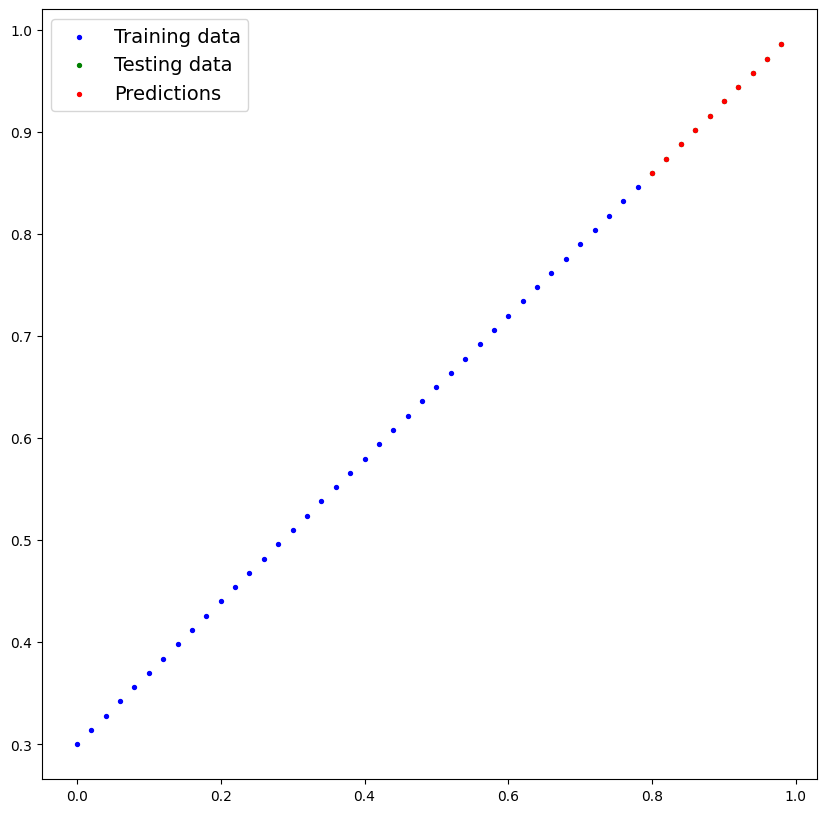

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_prediction(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. 'torch.save' - this allows you save a PyTorch object in PyThon's pickle format.
2. 'torch.load' - allows you to load a saved PyTorch object
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary


In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our models 'state_dict()' rather the entire model, we'll create a new instance of our model class and load the saved 'state_dict into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel() # is a sublaclass of nn.module

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

### 6. Putting it all together


In [ ]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code.

This means if we have access to a GPU, our code will use it (for faster computing)
If no GPU is available, the code will default to using CPU.

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

Using device: cuda


### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.9
bias = 0.5

# Create range value
start = 0
end = 1
step = 0.02

# Create the X and Y features and labels
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.5000],
         [0.5180],
         [0.5360],
         [0.5540],
         [0.5720],
         [0.5900],
         [0.6080],
         [0.6260],
         [0.6440],
         [0.6620]]))

In [ ]:
# Split the data
train_split = int(0.8 * len(X))  # we'll use 80% of our samples for training
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

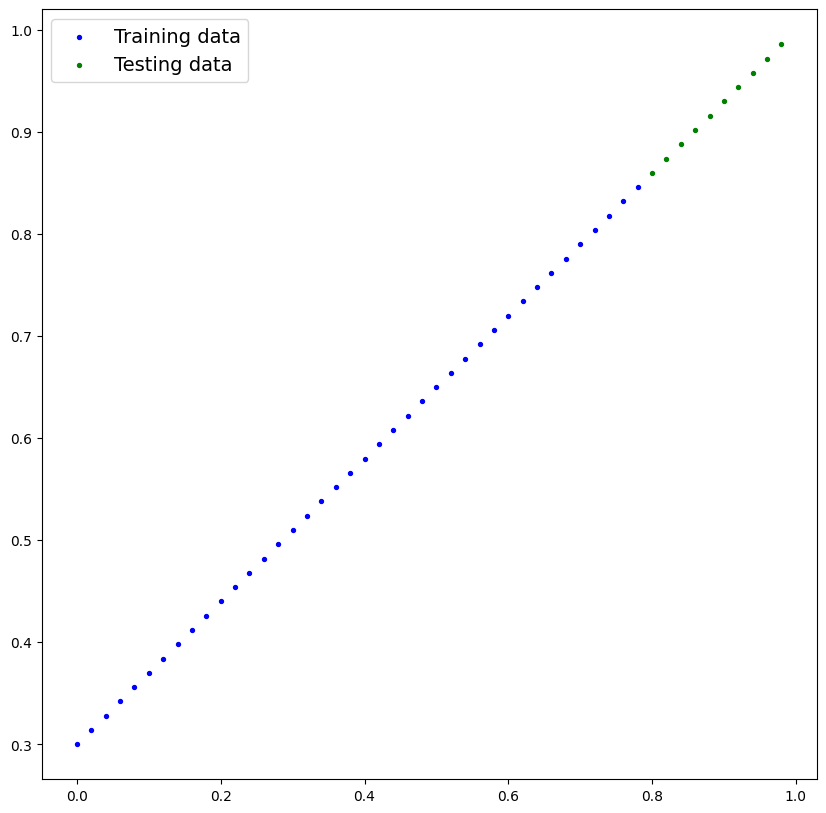

In [ ]:
# Plot the data
# Note: if you dont have the plot predictions functions loaded, this will erros
plot_prediction(X_train, y_train, X_test, y_test)

6.2 Building a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manuel seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_function = nn.L1Loss() #same as mae

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Lets write a training loop
torch.manual_seed(50)

epochs = 200

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch}. Loss: {loss}. Test loss: {test_loss}.')

Epoch: 0. Loss: 0.5551779866218567. Test loss: 0.5739762187004089.
Epoch: 10. Loss: 0.439968079328537. Test loss: 0.4392664134502411.
Epoch: 20. Loss: 0.3247582018375397. Test loss: 0.30455657839775085.
Epoch: 30. Loss: 0.20954833924770355. Test loss: 0.16984669864177704.
Epoch: 40. Loss: 0.09433845430612564. Test loss: 0.03513690456748009.
Epoch: 50. Loss: 0.023886388167738914. Test loss: 0.04784907028079033.
Epoch: 60. Loss: 0.019956795498728752. Test loss: 0.045803118497133255.
Epoch: 70. Loss: 0.016517987474799156. Test loss: 0.037530567497015.
Epoch: 80. Loss: 0.013089174404740334. Test loss: 0.02994490973651409.
Epoch: 90. Loss: 0.009653178043663502. Test loss: 0.02167237363755703.
Epoch: 100. Loss: 0.006215683650225401. Test loss: 0.014086711220443249.
Epoch: 110. Loss: 0.00278724217787385. Test loss: 0.005814164876937866.
Epoch: 120. Loss: 0.0012645035749301314. Test loss: 0.013801801018416882.
Epoch: 130. Loss: 0.0012645035749301314. Test loss: 0.013801801018416882.
Epoch: 140

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias

(0.9, 0.5)

### 6.4 Making and evaluating predcitions

In [ ]:
# Turn the model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

ValueError: ignored

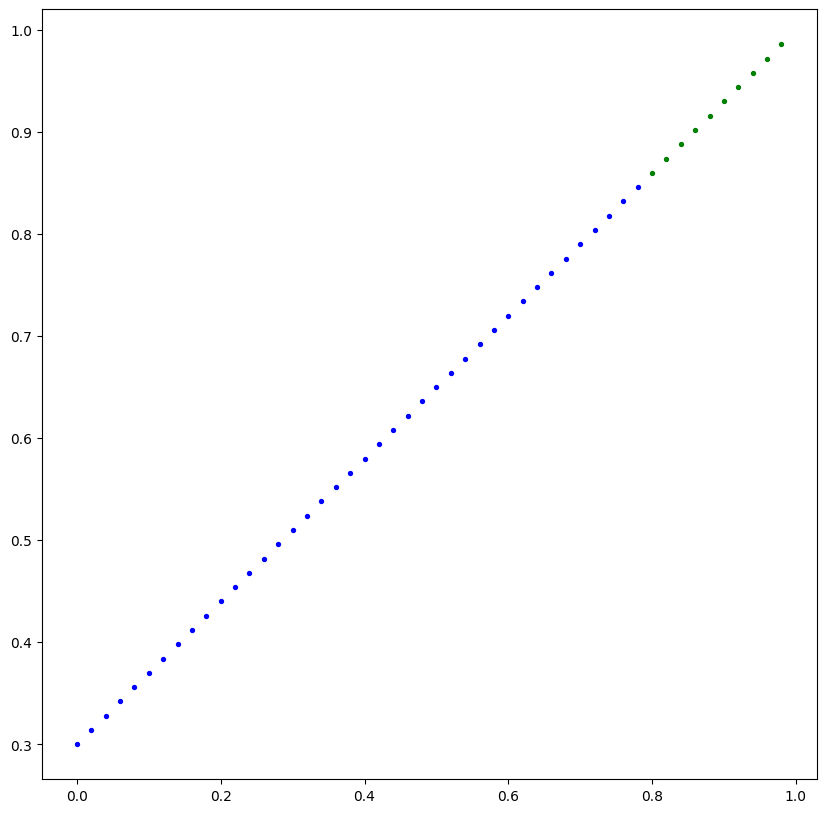

In [ ]:
# Check out our model predictions visually

plot_prediction(predictions=y_preds.cpu)
